# Analysis of the dataset: Show_leopard

In [6]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
import os
from utils import plot_names

%matplotlib inline

## Load annotations

This section is the same for all datasets. 

Update `dataDir` with the location of the data.

In [2]:
species = 'snowleopard.NEW' # 'snowleopard' # 'whaleshark'
dataDir='/home/olga/Datasets/coco.{}/coco'.format(species)
dataType= 'train2021' #'test2020' #'train2020'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

Initialize COCO api for instance annotations:

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


Display COCO categories and supercategories:

In [4]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
snow_leopard

COCO supercategories: 
animal


Load and display instance annotations:

Name: d3df58ac-2d62-4824-835f-fec1ca5147b4 Viewpoint: frontright


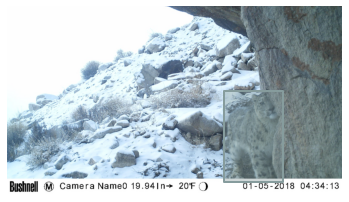

In [7]:
catIds = coco.getCatIds(catNms=nms);
imgIds = coco.getImgIds(catIds=catIds);

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#print(img)

I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print('Name: {} Viewpoint: {}'.format(anns[0]['name'], anns[0]['viewpoint']))
coco.showAnns(anns)
#anns

In [8]:
print('Total number of annotations: {}'.format(len(coco.getAnnIds(imgIds))))

Total number of annotations: 4167


## Analyse viewpoints

Collect `viewpoint` annotation, select unique viewpoints and compute how many annotations per viewpoint.

In [9]:
all_anns = coco.loadAnns(coco.getAnnIds())
ids_anns = np.array([ann['id'] for ann in all_anns])
views_anns = np.array([ann['viewpoint'] for ann in all_anns])

views, views_counts = np.unique(views_anns, return_counts=True)
views, views_counts

(array(['back', 'backleft', 'backright', 'front', 'frontleft',
        'frontright', 'left', 'right'], dtype='<U10'),
 array([698, 409, 409, 605, 462, 326, 558, 700]))

Plot bar chart to show distribution of annotations over viewpoints:

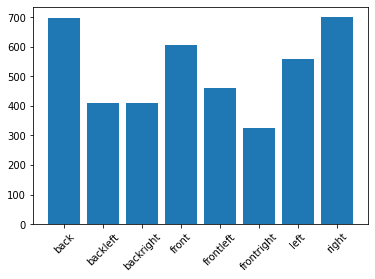

In [10]:
plt.bar(views, views_counts)
plt.xticks(rotation=45)
plt.show()

## Analyse names

Collect `name` annotation, select unique names and compute how many annotations per name.

In [11]:
names_anns = np.array([ann['name'] for ann in all_anns])
names, names_count = np.unique(names_anns, return_counts=True)
print('Found {} unique names'.format(len(names)))

Found 190 unique names


Plot bar chart to show how many names have a number of annotations:

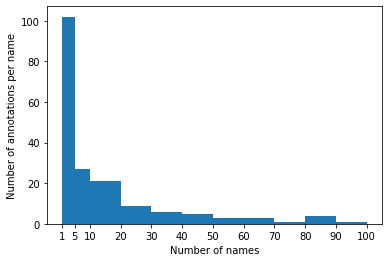

In [12]:
bins = (1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
plt.hist(names_count, bins=bins)
plt.xticks(bins)
plt.xlabel('Number of names')
plt.ylabel('Number of annotations per name')
plt.show()

A small number of names have over 100 annotations per name. Check these names visually later.

In [13]:
print('These names have over 100 annotations per name:\n{}'.\
      format('\n'.join(names[names_count>100].tolist())))

These names have over 100 annotations per name:
0438cb82-8641-4d2b-ace7-ad9561966ea0
3a174c1b-795b-4a7b-b770-11b52a10970c
7971408d-ebf3-4742-8173-55142f9f915b
7ef8ad2d-196b-46f4-aa52-43c48a517133
80e4f82c-1a85-4930-b8e7-e0909887ea70
dac002fc-493e-4cfa-b734-44de276583e2
f4d17282-d4cf-48b6-a82b-c58634748e77
feca5a8c-ece1-4057-b87d-3a6370e23842


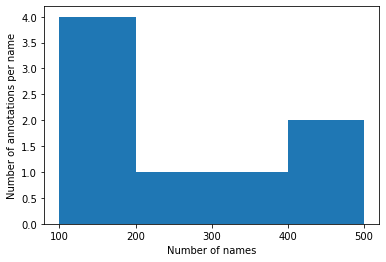

In [14]:
bins = (100, 200, 300, 400, 500)
plt.hist(names_count, bins=bins)
plt.xticks(bins)
plt.xlabel('Number of names')
plt.ylabel('Number of annotations per name')
plt.show()

In [15]:
names[names_count>100]

array(['0438cb82-8641-4d2b-ace7-ad9561966ea0',
       '3a174c1b-795b-4a7b-b770-11b52a10970c',
       '7971408d-ebf3-4742-8173-55142f9f915b',
       '7ef8ad2d-196b-46f4-aa52-43c48a517133',
       '80e4f82c-1a85-4930-b8e7-e0909887ea70',
       'dac002fc-493e-4cfa-b734-44de276583e2',
       'f4d17282-d4cf-48b6-a82b-c58634748e77',
       'feca5a8c-ece1-4057-b87d-3a6370e23842'], dtype='<U36')

In [16]:
for num in range(1, 11):
    print('{} names have {} image'.format((names_count == num).sum(), num))

for low in range(10, 160, 10):
    high = low + 10
    print('{} names have >{} and <={} images'.
          format(np.logical_and((names_count>low), 
                                (names_count<=high)).sum(), 
                 low, 
                 high))
for low in range(100, 500, 100):
    high = low + 100
    print('{} names have >{} and <={} images'.
          format(np.logical_and((names_count>low), 
                                (names_count<=high)).sum(), 
                 low, 
                 high))

49 names have 1 image
18 names have 2 image
24 names have 3 image
11 names have 4 image
5 names have 5 image
6 names have 6 image
10 names have 7 image
3 names have 8 image
3 names have 9 image
3 names have 10 image
19 names have >10 and <=20 images
9 names have >20 and <=30 images
6 names have >30 and <=40 images
5 names have >40 and <=50 images
2 names have >50 and <=60 images
3 names have >60 and <=70 images
1 names have >70 and <=80 images
4 names have >80 and <=90 images
1 names have >90 and <=100 images
0 names have >100 and <=110 images
2 names have >110 and <=120 images
0 names have >120 and <=130 images
1 names have >130 and <=140 images
0 names have >140 and <=150 images
0 names have >150 and <=160 images
4 names have >100 and <=200 images
1 names have >200 and <=300 images
1 names have >300 and <=400 images
2 names have >400 and <=500 images


(array([170.,  12.,   3.,   1.,   0.,   1.,   0.,   1.,   0.,   2.]),
 array([  1. ,  46.6,  92.2, 137.8, 183.4, 229. , 274.6, 320.2, 365.8,
        411.4, 457. ]),
 <BarContainer object of 10 artists>)

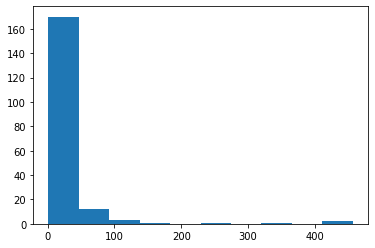

In [17]:
plt.hist(names_count, bins=10)

In [18]:
name = np.random.choice(names_anns, size=1)[0]
num_samples = (names_anns == name).sum()
print('Found {} annots for name {}'.format(num_samples, name))

Found 134 annots for name f4d17282-d4cf-48b6-a82b-c58634748e77


# Plot images for a random name

Get an array of filenames and bounding boxes for display purposes:

In [21]:
filenames = np.array([coco.loadImgs(ann['image_id'])[0]['file_name'] for ann in all_anns])
filenames = np.array(['%s/images/%s/%s'%(dataDir,dataType,f) for f in filenames])

bboxes = np.array([ann['segmentation_bbox'] for ann in all_anns])

Found 14 annots for name 771f8ec6-b20b-411f-a304-f0bf5cf51367


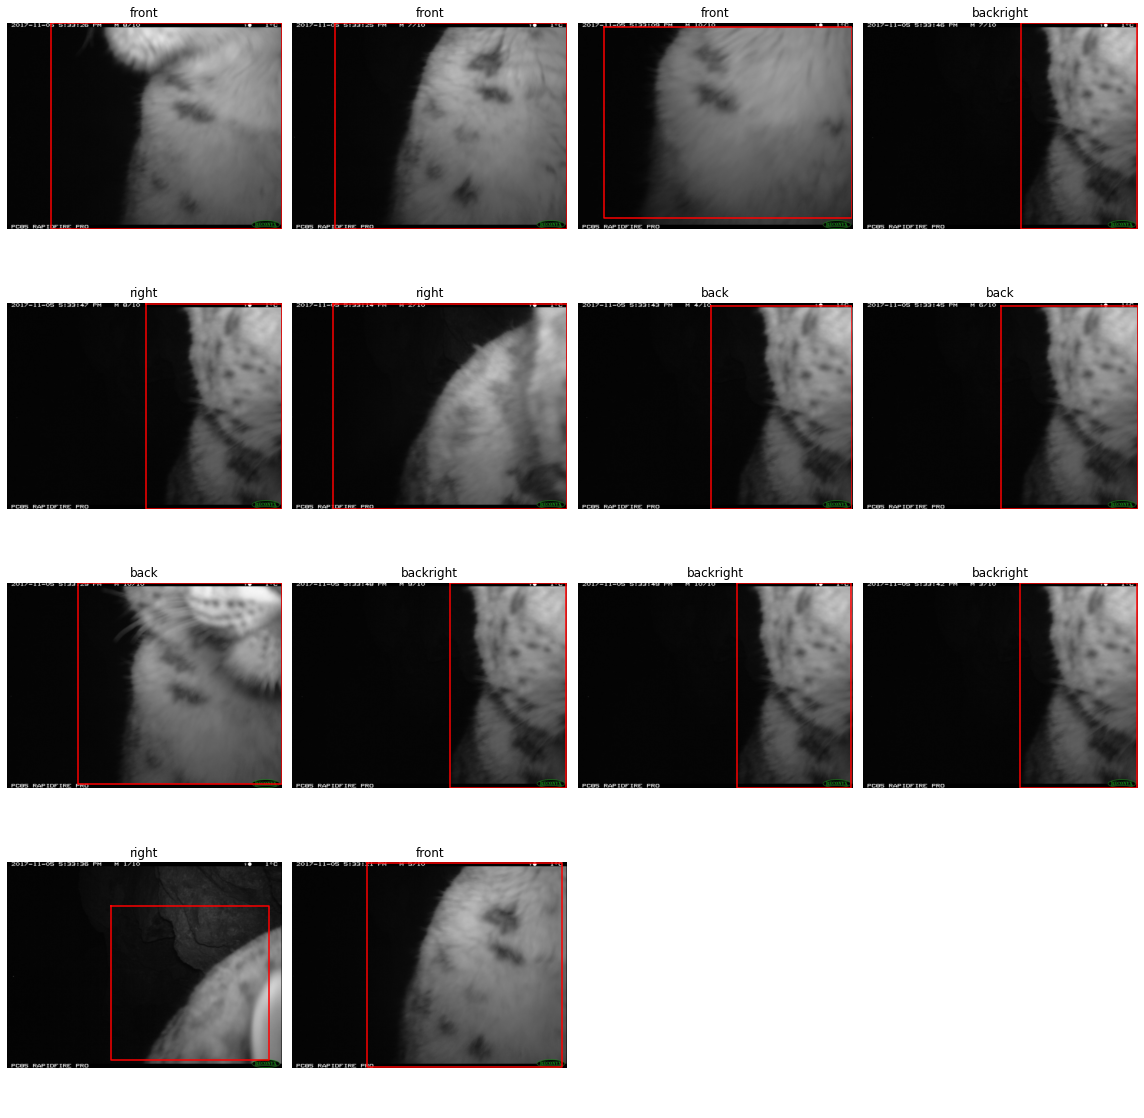

In [23]:
plot_names(names_anns, filenames, bboxes, views_anns, crop=False, max_display=16, ncols=4, ratio=(4,4))

Found 428 annots for name feca5a8c-ece1-4057-b87d-3a6370e23842


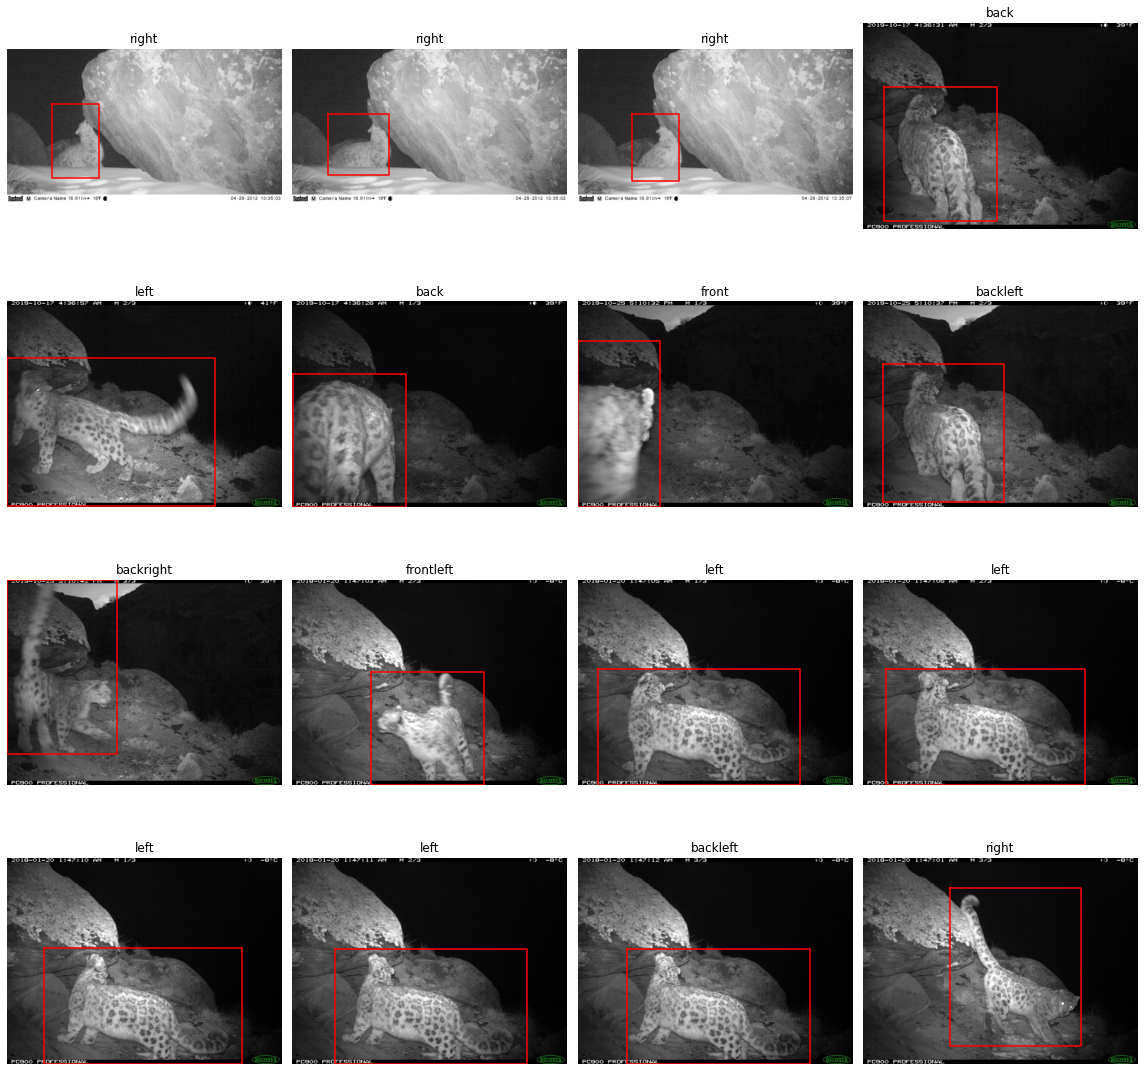

In [24]:
plot_names(names_anns, filenames, bboxes, views_anns, crop=False, max_display=16, ncols=4, ratio=(4,4))

Found 7 annots for name 158849c7-4882-4dd0-ae70-d4836a752da4


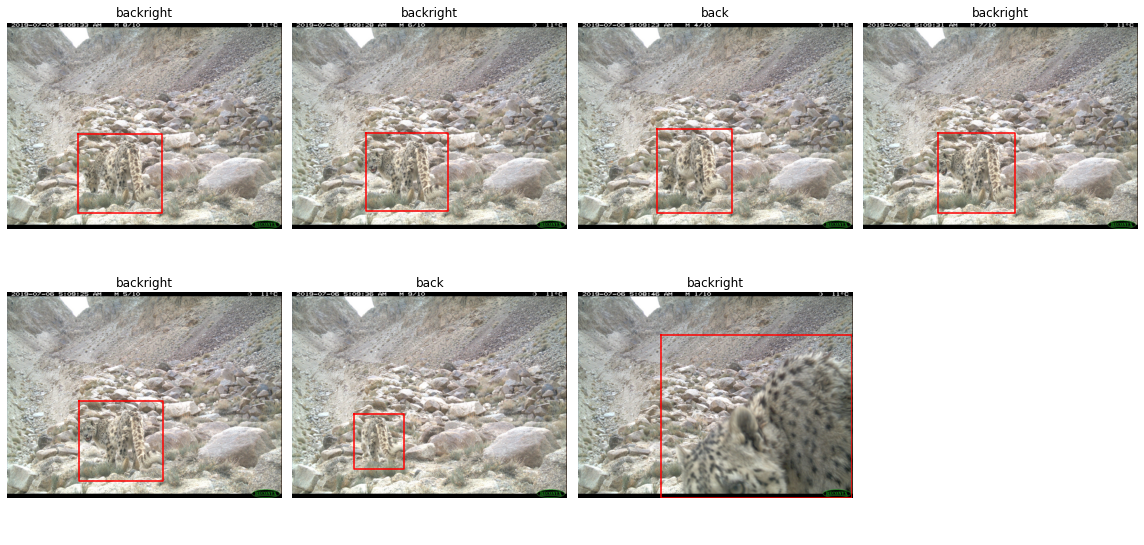

In [26]:
plot_names(names_anns, filenames, bboxes, views_anns, crop=False, max_display=16, ncols=4, ratio=(4,4))